# Choosing the Best MSCI World ETF

1) raccolgo tutti gli etf in justetf. 
1) scelgo ETF MSCI world migliore su cui investire (scelti 2, uno in EUR e uno in USD) -> done
1) Analisi su indici - Ragionamento su indici e categorizzazioni degli indici (non degli ETF). -> faccio su altri notebook
    - XXX qui serve ristrutturare meglio la funzione "get_etf_params", andando a vedere sul sito le varie opzioni che ci sono. Li clusterizzo secondo categorie e vedo quali cluster hanno performato meglio, quali hanno maggiori fluttuazioni + iniziare a usare la funzione chart
    - Modifico "overview" per avere la classificazione come sul sito justetf (manca ad esempio settore etc.). Idea è fare cicli for per andare a beccarmi tutte le possibili categorie e sottocategorie.
    - Creo un dataframe "indici" dove metto dentro come valori, le medie degli ETF che sottendono quell'indice.
    - Ogni indice sarà indicizzato con livelli: 1) classi (azioni, obbligaizoni etc), 2) sottoclassi 
    - Clusterizzo classi indici con k-means 
    - Vado a vedere negli ultimi x anni quali indici hanno performato meglio (top ten). Per ora lo faccio con overview su 5 anni -> lo vorrei fare con plot su    

1) quale ETF quindi è il migliore se ne dovessi scegliere 1?
1) Portfolio Analysis migliore negli ultimi anni (se dovessi scegliere più indici)



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import justetf_scraping

## Load the data

In [6]:
df = justetf_scraping.load_overview(enrich=True)
df

C:\Users\Alberto Gerri\Documents\00_ex_Onedrive_Poli\coding\justetf-scraping-1\justetf_scraping\overview.py:426: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({"Yes": True, "No": False}).astype("bool")
C:\Users\Alberto Gerri\Documents\00_ex_Onedrive_Poli\coding\justetf-scraping-1\justetf_scraping\overview.py:426: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({"Yes": True, "No": False}).astype("bool")


,wkn,ticker,valor,name,index,inception_date,age_in_days,age_in_years,strategy,domicile_country,...,last_three_years_return_per_risk,last_five_years_return_per_risk,max_drawdown,last_year_max_drawdown,last_three_years_max_drawdown,last_five_years_max_drawdown,asset,instrument,region,exchange
isin,,,,,,,,,,,,,,,,,,,,,
GB00BM9JYH62,A3GZKD,AVMX,<NA>,Global X Aave ETP,Aave,2023-03-13,348,0.953425,Long-only,Jersey,...,NaN,NaN,-40.18,NaN,NaN,NaN,,,,
IE000GGQK173,A3D4VW,R8T,125589092,abrdn Global Real Estate Active Thematics UCIT...,abrdn Global Real Estate Active Thematics,2023-02-22,367,1.005479,"Long-only, Active",Ireland,...,NaN,NaN,-15.23,NaN,NaN,NaN,,,,
IE00B0M62Y33,A0HGWF,IUSJ,2308837,iShares AEX UCITS ETF,AEX®,2005-11-18,6672,18.279452,Long-only,Ireland,...,0.68,0.64,-62.93,-9.52,-22.39,-35.73,,,,
IE00BMTX2B82,A2P9XA,AYE7,56145411,iShares AEX UCITS ETF EUR (Acc),AEX®,2020-07-29,1305,3.575342,Long-only,Ireland,...,0.60,NaN,-22.46,-9.56,-22.46,NaN,,,,
NL0009272749,A1JN2C,2TCA,<NA>,VanEck AEX UCITS ETF,AEX®,2009-12-14,5185,14.205479,Long-only,Netherlands,...,0.62,0.65,-35.65,-9.41,-22.16,-35.65,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IE00BKFB6L02,A2PRV7,UEQC,50164024,UBS ETF (IE) CMCI Commodity Carry SF UCITS ETF...,UBS CM-BCOM Outperformance Strategy ex-Preciou...,2020-01-16,1500,4.109589,Short & Leveraged,Ireland,...,1.15,NaN,-18.14,-7.56,-12.01,NaN,,,,
IE00BMC5DW92,A2P2W5,COSIC,54094558,UBS ETF (IE) CMCI Commodity Carry SF UCITS ETF...,UBS CM-BCOM Outperformance Strategy ex-Preciou...,2020-06-11,1353,3.706849,Short & Leveraged,Ireland,...,0.92,NaN,-13.00,-5.71,-13.00,NaN,,,,
IE00BMC5DV85,A2P2W6,UEQV,54094592,UBS ETF (IE) CMCI Commodity Carry SF UCITS ETF...,UBS CM-BCOM Outperformance Strategy ex-Preciou...,2020-06-11,1353,3.706849,Short & Leveraged,Ireland,...,0.67,NaN,-15.67,-5.74,-15.67,NaN,,,,


In [8]:
df.columns

Index(['wkn', 'ticker', 'valor', 'name', 'index', 'inception_date',
       'age_in_days', 'age_in_years', 'strategy', 'domicile_country',
       'currency', 'hedged', 'securities_lending', 'dividends', 'ter',
       'replication', 'size', 'is_sustainable', 'number_of_holdings',
       'yesterday', 'last_week', 'last_month', 'last_three_months',
       'last_six_months', 'last_year', 'last_three_years', 'last_five_years',
       '2023', '2022', '2021', '2020', 'last_dividends', 'last_year_dividends',
       'last_year_volatility', 'last_three_years_volatility',
       'last_five_years_volatility', 'last_year_return_per_risk',
       'last_three_years_return_per_risk', 'last_five_years_return_per_risk',
       'max_drawdown', 'last_year_max_drawdown',
       'last_three_years_max_drawdown', 'last_five_years_max_drawdown',
       'asset', 'instrument', 'region', 'exchange'],
      dtype='object')

## Capire quale ETF MSCI World scegliere -> __done__

## Lavoro sugli indici

In [27]:
df_index=df[['index','age_in_years', 'ter','size','number_of_holdings','last_year', 'last_three_years', 'last_five_years','2023', '2022', '2021', '2020','last_year_volatility', 'last_three_years_volatility',
       'last_five_years_volatility', 'last_year_return_per_risk',
       'last_three_years_return_per_risk', 'last_five_years_return_per_risk',
       'max_drawdown', 'last_year_max_drawdown',
       'last_three_years_max_drawdown', 'last_five_years_max_drawdown']]
df_index=df_index.groupby(['index']).mean()


In [28]:
df_index

,age_in_years,ter,size,number_of_holdings,last_year,last_three_years,last_five_years,2023,2022,2021,...,last_year_volatility,last_three_years_volatility,last_five_years_volatility,last_year_return_per_risk,last_three_years_return_per_risk,last_five_years_return_per_risk,max_drawdown,last_year_max_drawdown,last_three_years_max_drawdown,last_five_years_max_drawdown
index,,,,,,,,,,,,,,,,,,,,,
21Shares Bitcoin Suisse,4.394521,2.500,36.0,<NA>,92.42,22.850000,NaN,126.670000,-64.75,129.880,...,43.160,64.330000,NaN,2.140000,0.110000,NaN,-74.880000,-18.610000,-74.880000,NaN
21Shares Crypto Basket,5.263014,2.500,137.0,<NA>,73.09,-17.370000,680.690,126.420000,-72.72,166.390,...,41.500,66.470000,69.840,1.760000,-0.090000,0.730,-81.520000,-23.130000,-81.520000,-81.520
AEX®,12.020091,0.300,314.333333,25.0,14.80,34.233333,75.885,16.853333,-11.73,29.990,...,11.970,16.283333,18.525,1.236667,0.633333,0.645,-40.346667,-9.496667,-22.336667,-35.690
AMX,14.205479,0.350,21.0,25.0,-10.89,-2.680000,32.720,2.610000,-10.69,18.150,...,16.320,17.240000,20.250,-0.670000,-0.050000,0.290,-42.260000,-23.320000,-26.250000,-42.260
ATX®,15.432877,0.285,70.0,20.0,1.52,22.765000,29.340,14.320000,-16.51,42.255,...,15.375,19.615000,23.120,0.095000,0.360000,0.225,-62.090000,-15.000000,-32.655000,-49.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iSTOXX® FactSet Breakthrough Healthcare,7.465753,0.400,1036.0,198.0,1.16,-18.340000,21.570,-1.460000,-18.99,1.800,...,15.020,20.020000,21.830,0.080000,-0.330000,0.180,-38.720000,-19.860000,-36.960000,-38.720
iSTOXX® FactSet Digitalisation,7.465753,0.400,1004.0,190.0,20.63,-8.090000,40.840,27.140000,-31.99,8.890,...,15.490,21.760000,22.250,1.330000,-0.130000,0.320,-38.580000,-13.460000,-38.580000,-38.580
iStoxx Access Metaverse,1.482192,0.390,6.0,55.0,53.40,NaN,NaN,60.190000,NaN,NaN,...,19.580,NaN,NaN,2.730000,NaN,NaN,-17.350000,-9.640000,NaN,NaN


In [89]:
df_1=df_index.sort_values(by='last_five_years',ascending=False).iloc[0:20,:]
df_2=df_index.loc['MSCI World',:]
df_3=df_index.loc['S&P 500®']
df_4=pd.concat([df_1,df_2.to_frame().T,df_3.to_frame().T]).astype(float).reset_index()

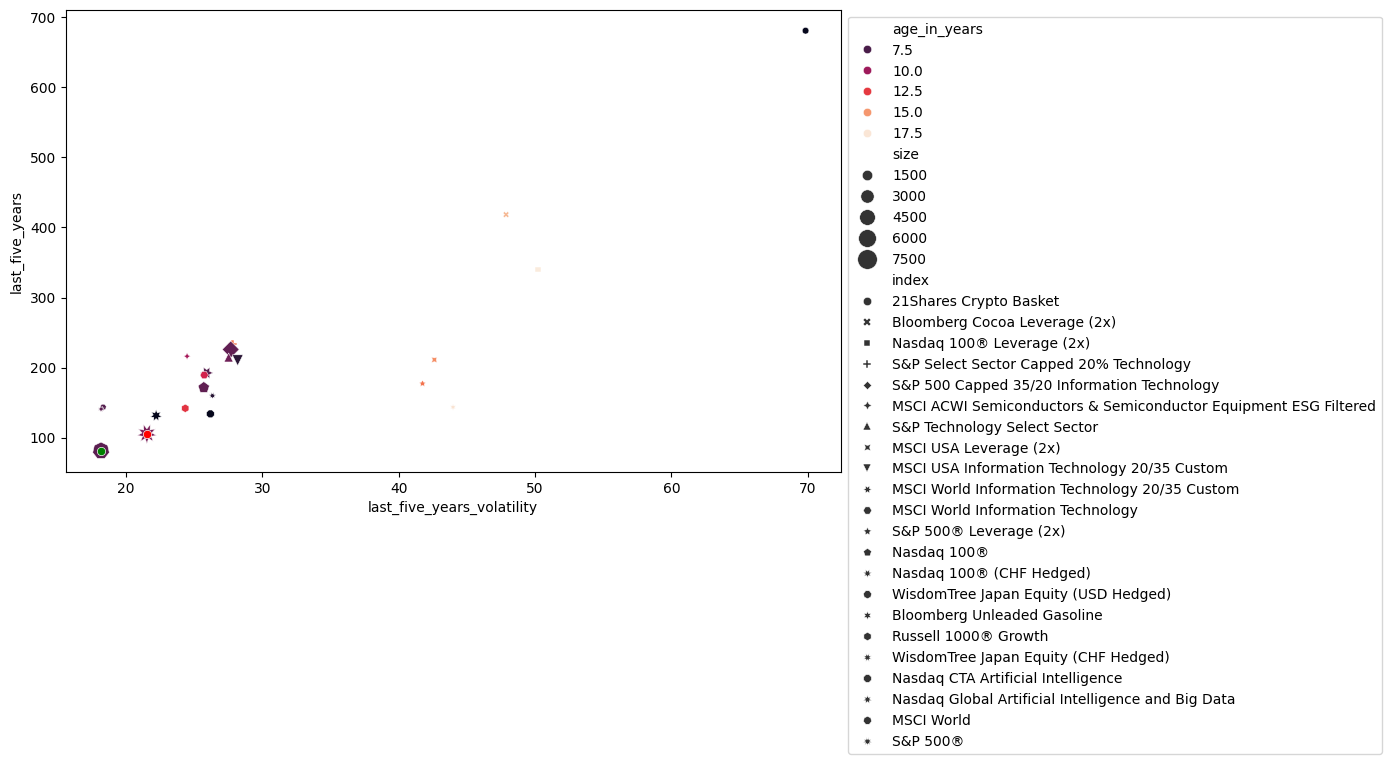

In [112]:
fig=plt.figure(figsize=(10,6))
ax=sns.scatterplot(data=df_4, x="last_five_years_volatility", y="last_five_years", style="index", hue='age_in_years',size="size", palette=sns.color_palette("rocket", as_cmap=True), sizes=(20, 200))
ax_1=sns.scatterplot(data=df_2.to_frame().T, x="last_five_years_volatility", y="last_five_years", color='green', sizes=200)
ax_2=sns.scatterplot(data=df_3.to_frame().T, x="last_five_years_volatility", y="last_five_years", color='red', sizes=200)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

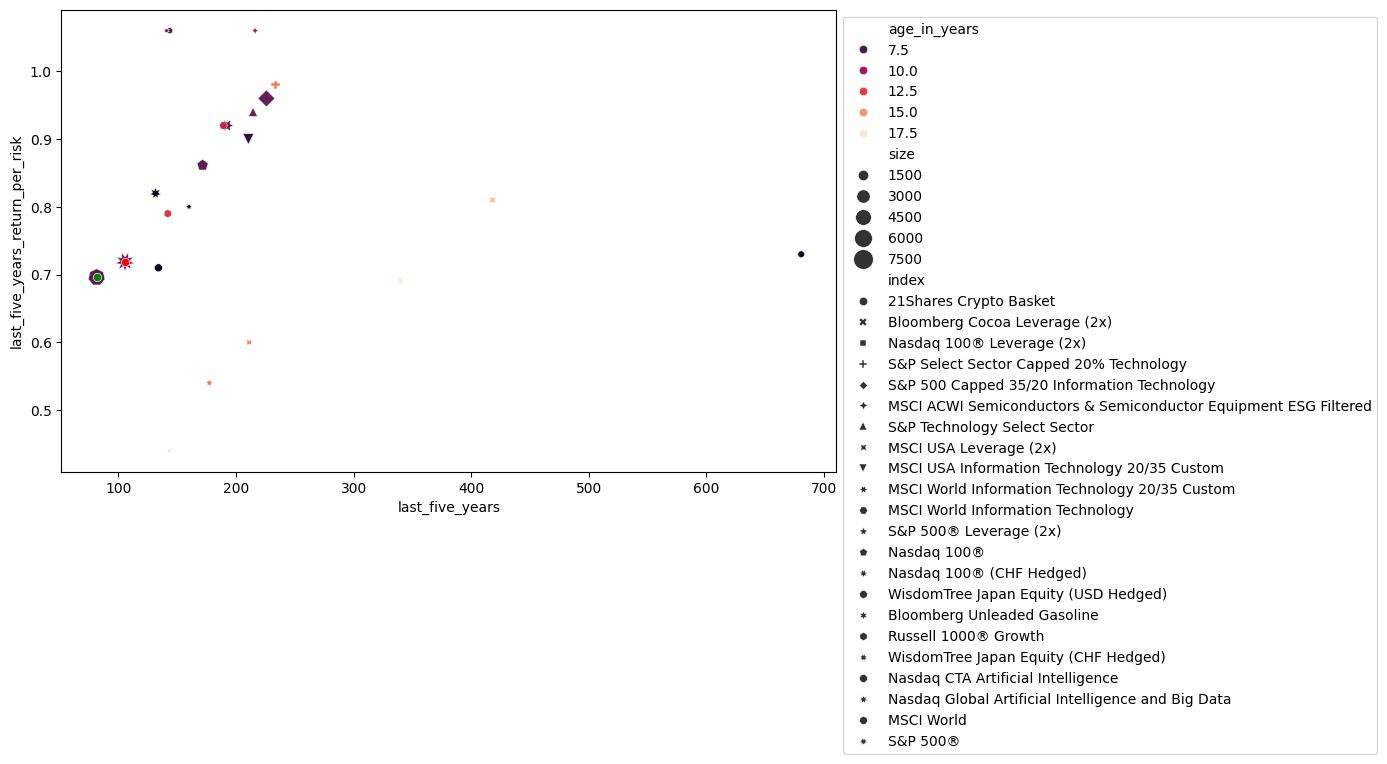

In [113]:
fig=plt.figure(figsize=(10,6))
ax=sns.scatterplot(data=df_4, x="last_five_years", y="last_five_years_return_per_risk", style="index", hue='age_in_years',size="size", palette=sns.color_palette("rocket", as_cmap=True), sizes=(20, 200))
ax_1=sns.scatterplot(data=df_2.to_frame().T, x="last_five_years", y="last_five_years_return_per_risk", color='green', sizes=200)
ax_2=sns.scatterplot(data=df_3.to_frame().T, x="last_five_years", y="last_five_years_return_per_risk", color='red', sizes=200)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [119]:
df_ret_risk=df_4.sort_values(by='last_five_years_volatility',ascending=True).iloc[0:20,:]
df_ret_risk

,index,age_in_years,ter,size,number_of_holdings,last_year,last_three_years,last_five_years,2023,2022,...,last_year_volatility,last_three_years_volatility,last_five_years_volatility,last_year_return_per_risk,last_three_years_return_per_risk,last_five_years_return_per_risk,max_drawdown,last_year_max_drawdown,last_three_years_max_drawdown,last_five_years_max_drawdown
20,MSCI World,8.069923,0.225652,5488.565217,1456.571429,21.444286,40.624118,81.438000,19.529524,-13.053158,...,11.067619,15.061176,18.158000,1.938095,0.801176,0.696000,-30.909130,-6.811429,-16.961765,-34.087333
17,WisdomTree Japan Equity (CHF Hedged),8.065753,0.450000,3.000000,501.000000,48.900000,97.820000,140.840000,43.200000,8.220000,...,16.940000,17.340000,18.170000,2.890000,1.470000,1.060000,-33.330000,-9.340000,-9.550000,-29.870000
14,WisdomTree Japan Equity (USD Hedged),7.872603,0.480000,51.000000,501.000000,50.680000,113.090000,143.625000,35.590000,13.130000,...,17.075000,16.600000,18.315000,2.970000,1.725000,1.060000,-33.215000,-10.325000,-10.325000,-31.790000
21,S&P 500®,8.939199,0.091923,7551.769231,503.100000,26.049200,53.158000,105.571667,21.682000,-13.170000,...,13.158000,18.095500,21.522778,1.980400,0.845000,0.718889,-29.235385,-7.013200,-17.162500,-33.671111
19,Nasdaq Global Artificial Intelligence and Big ...,5.073973,0.350000,2182.000000,83.000000,57.610000,48.320000,131.500000,61.680000,-30.710000,...,17.440000,20.830000,22.200000,3.300000,0.670000,0.820000,-33.500000,-7.530000,-33.320000,-33.500000
16,Russell 1000® Growth,12.336986,0.190000,679.000000,NaN,40.660000,54.380000,141.910000,37.210000,-25.070000,...,15.650000,22.400000,24.340000,2.600000,0.700000,0.790000,-31.380000,-7.150000,-27.410000,-31.380000
5,MSCI ACWI Semiconductors & Semiconductor Equip...,10.286301,0.350000,133.500000,75.000000,75.795000,63.595000,216.260000,71.820000,-33.090000,...,24.065000,27.060000,24.470000,3.145000,0.655000,1.060000,-46.830000,-11.465000,-39.160000,-39.140000
12,Nasdaq 100®,8.207587,0.240769,2237.692308,101.000000,45.325000,54.918889,171.540000,49.278333,-28.455455,...,17.029167,23.936667,25.695714,2.661667,0.656667,0.861429,-32.716154,-7.400833,-31.272222,-31.252857
10,MSCI World Information Technology,11.631963,0.300000,714.666667,156.000000,47.710000,64.053333,189.283333,47.643333,-26.630000,...,17.730000,23.670000,25.730000,2.693333,0.760000,0.920000,-31.886667,-8.473333,-29.270000,-31.886667
9,MSCI World Information Technology 20/35 Custom,7.967123,0.250000,2802.000000,156.000000,48.350000,65.100000,192.410000,48.160000,-26.580000,...,17.860000,23.920000,25.910000,2.710000,0.760000,0.920000,-31.920000,-8.430000,-29.030000,-31.920000


In [138]:
# df_world=df[df['index'].str.contains('MSCI World')]
df_world=df[(df['index']=='MSCI World')|(df['index']=='MSCI World (EUR Hedged)')]

In [149]:
df_world['size']=df_world['size'].astype(float)
# list(df_world['index'])
df_world.columns

C:\Users\Alberto Gerri\AppData\Local\Temp\ipykernel_16092\2346612054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_world['size']=df_world['size'].astype(float)


Index(['wkn', 'ticker', 'valor', 'name', 'index', 'inception_date',
       'age_in_days', 'age_in_years', 'strategy', 'domicile_country',
       'currency', 'hedged', 'securities_lending', 'dividends', 'ter',
       'replication', 'size', 'is_sustainable', 'number_of_holdings',
       'yesterday', 'last_week', 'last_month', 'last_three_months',
       'last_six_months', 'last_year', 'last_three_years', 'last_five_years',
       '2023', '2022', '2021', '2020', 'last_dividends', 'last_year_dividends',
       'last_year_volatility', 'last_three_years_volatility',
       'last_five_years_volatility', 'last_year_return_per_risk',
       'last_three_years_return_per_risk', 'last_five_years_return_per_risk',
       'max_drawdown', 'last_year_max_drawdown',
       'last_three_years_max_drawdown', 'last_five_years_max_drawdown',
       'asset', 'instrument', 'region', 'exchange'],
      dtype='object')

In [151]:
df_world[df_world['hedged']==True]['last_five_years'].mean()

61.779999999999994

In [155]:
df_world[(df_world['hedged']==False)&((df_world['currency']=='EUR'))]['last_five_years'].mean()

81.04666666666667

In [156]:
df_world[(df_world['hedged']==False)&((df_world['currency']!='EUR'))]['last_five_years'].mean()

81.53583333333334

In [184]:
df_world_eur=df_world[[ 'ticker', 'valor', 'name', 'index', 'inception_date',
        'age_in_years',  'ter', 'dividends',
       'replication', 'size', 'number_of_holdings',
       'yesterday',  'last_year',  'last_five_years',
       'last_year_volatility', 
       'last_five_years_volatility', 'last_year_return_per_risk',
        'last_five_years_return_per_risk',
       'max_drawdown', 'last_five_years_max_drawdown','currency']]
                                                                                     
df_world_eur.to_csv('MSCI_world_eur.csv')

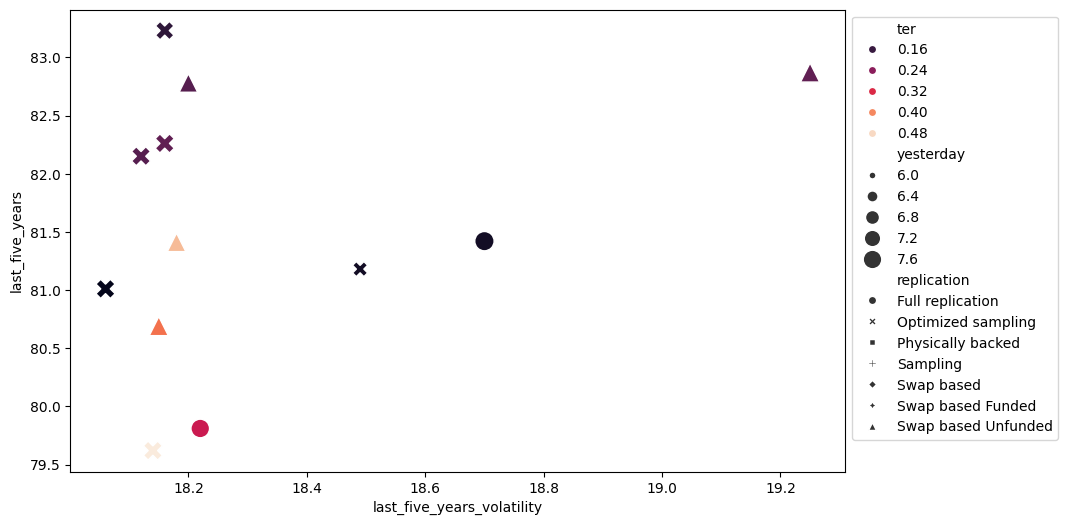

In [181]:
fig=plt.figure(figsize=(10,6))
ax=sns.scatterplot(data=df_world_eur, x="last_five_years_volatility", y="last_five_years", style="replication", hue='ter',size="yesterday", palette=sns.color_palette("rocket", as_cmap=True), sizes=(10, 200))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [137]:
(1.13-1.08)/1.13



0.044247787610619316